# Data Science Unit 2 Sprint Challenge 3

## Logistic Regression and Beyond

In this sprint challenge you will fit a logistic regression modeling the probability of an adult having an income above 50K. The dataset is available at UCI:

https://archive.ics.uci.edu/ml/datasets/adult

Your goal is to:

1. Load, validate, and clean/prepare the data.
2. Fit a logistic regression model
3. Answer questions based on the results (as well as a few extra questions about the other modules)

Don't let the perfect be the enemy of the good! Manage your time, and make sure to get to all parts. If you get stuck wrestling with the data, simplify it (if necessary, drop features or rows) so you're able to move on. If you have time at the end, you can go back and try to fix/improve.

### Hints

It has a variety of features - some are continuous, but many are categorical. You may find [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) (a method to one-hot encode) helpful!

The features have dramatically different ranges. You may find [sklearn.preprocessing.minmax_scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.minmax_scale.html#sklearn.preprocessing.minmax_scale) helpful!

## Part 1 - Load, validate, and prepare data

The data is available at: https://archive.ics.uci.edu/ml/datasets/adult

Load it, name the columns, and make sure that you've loaded the data successfully. Note that missing values for categorical variables can essentially be considered another category ("unknown"), and may not need to be dropped.

You should also prepare the data for logistic regression - one-hot encode categorical features as appropriate.

### Importing different libraries, loading the file and fixing the columns 
### Also, fixed missing values in categorical columns as "unknown"


In [1]:
from __future__ import print_function, division
import pandas as pd

from __future__ import print_function, division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
#let's laod the file
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)

In [157]:
#check the whole file 
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_fiftyk
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [141]:
#let's do a quick check for column names
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [148]:
#let's get all the column names and fix the dataframe
df.columns = ["age","workclass","fnlwgt","education","education_num","marital_status",
               "occupation","relationship","race","sex", "capital_gain","capital_loss",
               "hours_per_week","native_country", "income_fiftyk"]

In [149]:
#make sure the df looks ok
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_fiftyk
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [30]:
#check the shape
df.shape

(32561, 15)

In [26]:
#missign values
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_fiftyk     0
dtype: int64

In [150]:
df.occupation[27]

' ?'

In [151]:
#it doesn't show any missing values
#but we know that it has a few question marks
#also by printing, I noticed that there is space before "?"
from __future__ import print_function, division
import numpy as np
#df = df.replace('?', np.NaN)
df = df.replace(' ?', "unknown")

In [152]:
#categorical missing vlaues are fixed
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_fiftyk
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [34]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_fiftyk     0
dtype: int64

In [45]:
#let's check the shape again
df.shape

(32561, 15)

In [46]:
#let's quickly check the overall distribtion by creating a table
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
#Notice it doesn't show all the columns we might want to see because those columns are not coded yet

In [154]:
# #lets try .get_dummies
# df2 =pd.get_dummies(df)
# #pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)[source]

In [155]:
df2.shape

(32561, 110)

### Now I will one-hot-encode the data file to prepare to perform Logistic regression

In [47]:
from sklearn.preprocessing import LabelEncoder
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df

In [48]:
dummyEncode(df)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_fiftyk
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
5,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
6,49,3,160187,6,5,3,7,1,2,0,0,0,16,22,0
7,52,5,209642,11,9,2,3,0,4,1,0,0,45,38,1
8,31,3,45781,12,14,4,9,1,4,0,14084,0,50,38,1
9,42,3,159449,9,13,2,3,0,4,1,5178,0,40,38,1


In [49]:
#let see if one hot encoding preserves the shape
#and yest, it did
df.shape

(32561, 15)

In [51]:
df.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_fiftyk
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.376371,1.897784e+05,10.298210,10.080679,2.611836,6.421762,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.470870,0.240810
std,13.640433,1.582038,1.055500e+05,3.870264,2.572720,1.506222,4.328619,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,6.083092,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783560e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


## Part 2 - Fit and present a Logistic Regression

Your data should now be in a state to fit a logistic regression. Use scikit-learn, define your `X` (independent variable) and `y`, and fit a model.

Then, present results - display coefficients in as interpretible a way as you can (hint - scaling the numeric features will help, as it will at least make coefficients more comparable to each other). If you find it helpful for interpretation, you can also generate predictions for cases (like our 5 year old rich kid on the Titanic) or make visualizations - but the goal is your exploration to be able to answer the question, not any particular plot (i.e. don't worry about polishing it).

It is *optional* to use `train_test_split` or validate your model more generally - that is not the core focus for this week. So, it is suggested you focus on fitting a model first, and if you have time at the end you can do further validation.

In [78]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income_fiftyk'],
      dtype='object')

In [100]:
#let's make our X matrix and y vector from the dataframe
# # X = df[['age', 'workclass', 'education', 'education_num',
#        'marital_status', 'occupation', 'race', 'sex',
#         'hours_per_week', 'native_country']]
X = df.drop('income_fiftyk', axis='columns')
y = df['income_fiftyk']


In [101]:
X.shape

(32561, 14)

In [102]:
#let's check the shape of X and y
#X looks good
#y look sgood too
print(X.shape)
print(y.shape)

(32561, 14)
(32561,)


In [103]:
#now since our data is very different range, 
#it's better to scale our X matrix
#let's import sklearn
import sklearn
from sklearn.preprocessing import minmax_scale
X_scaled = sklearn.preprocessing.minmax_scale(X, feature_range=(0, 1), axis=0, copy=True)

In [118]:
X_scaled

array([[0.30136986, 0.75      , 0.0443019 , ..., 0.        , 0.39795918,
        0.92682927],
       [0.45205479, 0.625     , 0.0482376 , ..., 0.        , 0.12244898,
        0.92682927],
       [0.28767123, 0.375     , 0.13811345, ..., 0.        , 0.39795918,
        0.92682927],
       ...,
       [0.56164384, 0.375     , 0.09482688, ..., 0.        , 0.39795918,
        0.92682927],
       [0.06849315, 0.375     , 0.12849934, ..., 0.        , 0.19387755,
        0.92682927],
       [0.47945205, 0.5       , 0.18720338, ..., 0.        , 0.39795918,
        0.92682927]])

In [105]:
#the shape looks good and we have the the scaled values 
X_scaled.shape

(32561, 14)

In [106]:
#import the module
from sklearn.linear_model import LogisticRegression

#Let's perform the logistic regression here 
log_reg = LogisticRegression().fit(X_scaled, y)

#accuracy score
log_reg.score(X_scaled, y)

0.8234083719787476

In [107]:
#since our X is scaled, these coefs are going to be meaningful
log_reg.coef_

array([[ 2.57713828, -0.86583986,  0.61643752,  0.19219354,  4.848966  ,
        -1.35822422, -0.04822432, -0.60744076,  0.4413802 ,  0.8832216 ,
        18.69155075,  2.73004869,  2.78011485, -0.03497966]])

In [115]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [109]:
log_reg.predict(X_scaled)

array([0, 0, 0, ..., 0, 0, 1])

In [110]:
log_reg.predict_proba(X_scaled)

array([[0.67552666, 0.32447334],
       [0.69903563, 0.30096437],
       [0.76343481, 0.23656519],
       ...,
       [0.95609837, 0.04390163],
       [0.96896128, 0.03103872],
       [0.44080567, 0.55919433]])

In [97]:
log_reg.intercept_

array([-7.27750027])

### Test case example
We created a numpy array with 14 values to match the number of features on our scaled X matrix. 

In [120]:
import numpy as np

test_case = np.array([[0.20136986, 0.65, 0.0543019, 0.7, 0.9,
       0.56666667, 0., 0.1, 1., 1., 0.03174022, 0., 0.36795918, 0.82682927]])  # Rich 5-year old in first class


#### let's see what our trained model predicts
It predicts that such as obervation will make less than 50k. 

In [121]:
log_reg.predict(test_case)

array([0])

### let's print columns to able to index them in the graphs

In [130]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income_fiftyk'],
      dtype='object')

In [ ]:
#Another graphical example
#age and Y

/home/mishraka/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


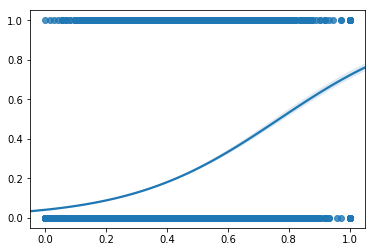

In [131]:
import seaborn as sns
sns.regplot(x=X_scaled[:,0], y=log_reg.predict(X_scaled), data=df, logistic=True)

In [ ]:
sns.regplot(x=X_scaled[:,6], y=log_reg.predict(X_scaled), data=df, logistic=True)

/home/mishraka/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


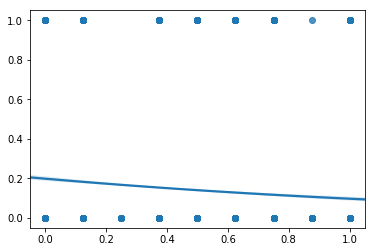

In [134]:
#negative correlation between workclass and income
sns.regplot(x=X_scaled[:,1], y=log_reg.predict(X_scaled), data=df, logistic=True)

/home/mishraka/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


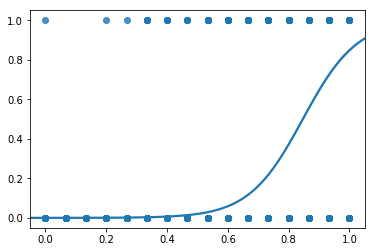

In [135]:
#education number and income
#It's beautiful!!!!
sns.regplot(x=X_scaled[:,4], y=log_reg.predict(X_scaled), data=df, logistic=True)

## Part 3 - Analysis, Interpretation, and Questions

### Based on your above model, answer the following questions

1. What are 3 features positively correlated with income above 50k?
2. What are 3 features negatively correlated with income above 50k?
3. Overall, how well does the model explain the data and what insights do you derive from it?

*These answers count* - that is, make sure to spend some time on them, connecting to your analysis above. There is no single right answer, but as long as you support your reasoning with evidence you are on the right track.

Note - scikit-learn logistic regression does *not* automatically perform a hypothesis test on coefficients. That is OK - if you scale the data they are more comparable in weight.

### Match the following situation descriptions with the model most appropriate to addressing them

In addition to logistic regression, a number of other approaches were covered this week. Pair them with the situations they are most appropriate for, and briefly explain why.

Situations:
1. You are given data on academic performance of primary school students, and asked to fit a model to help predict "at-risk" students who are likely to receive the bottom tier of grades.
2. You are studying tech companies and their patterns in releasing new products, and would like to be able to model and predict when a new product is likely to be launched.
3. You are working on modeling expected plant size and yield with a laboratory that is able to capture fantastically detailed physical data about plants, but only of a few dozen plants at a time.

Approaches:
1. Ridge Regression
2. Quantile Regression
3. Survival Analysis


## Part 3 - Analysis, Interpretation, and Questions

### Based on your above model, answer the following questions


Coefficients:

[[ 2.57713828, -0.86583986,  0.61643752,  0.19219354,  4.848966  ,
        -1.35822422, -0.04822432, -0.60744076,  0.4413802 ,  0.8832216 ,
        18.69155075,  2.73004869,  2.78011485, -0.03497966]]
        
Features:

['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')
      
1. What are 3 features positively correlated with income above 50k? 
 
### The features age, education number, capital gain, and capital loss are positively correlated with income levels. It also makes sense:
 1. as people get more expeirenced with age, they get better paid jobs than entry level postions (usually younger people start their career at entry level jobs)
 2. people who invest money in stocks etc will have capital gain and losses and thus it is positively correlated
 3. it's a continous in the dataset. Higher the number, more educated a person. More educated a person, higher chances of getting a high paying jobs
      


Coefficients:

[[ 2.57713828, -0.86583986,  0.61643752,  0.19219354,  4.848966  ,
        -1.35822422, -0.04822432, -0.60744076,  0.4413802 ,  0.8832216 ,
        18.69155075,  2.73004869,  2.78011485, -0.03497966]]
        
Features:

['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')
      
## 2. What are 3 features negatively correlated with income above 50k?
  
 ### Work Class, marital status, occupation, relationship, and native country
 
 workclass has a vartiety of classes like wihtout-pay, never worked etc. And plausibly this brings the coef down to negative. 
 
 The same way, martital status is negativley correlated. May be because women aren't taking up jobs because of household duties.

natively country has a negative correlation. And it makes sense. Developing countries have lower levels of per capital income in general. More diverse the countries in the dataset, higher might be the magnitude of this negative coef. However, interestingly, if the dataset has only developed or rich countries, it will have a postiive coef for country. 

### 3. Overall, how well does the model explain the data and what insights do you derive from it?

The model's accuracy score is about 82%. It's not great but it's not bad either. I was surprised to see the coeffceints. I was thinking that for race and gender, the coef might be negative meaning women are more likely to earn less and same with the people of color. Also, I didn't expect to see such a big coef for capital gain. But it makes sense because people who have capital gains see an enormous increase in their income in comparision to people who don't have any capital gains. 

Even for marital status, I was hoping to see a positive coef thinking that married people would earn more money. But I was wrong. May be the data doesn't completely represents the changing dynamics of the society as the data description suggests, it might be from around 1996.  

### Match the following situation descriptions with the model most appropriate to addressing them

In addition to logistic regression, a number of other approaches were covered this week. Pair them with the situations they are most appropriate for, and briefly explain why.

Situations:
1. You are given data on academic performance of primary school students, and asked to fit a model to help predict "at-risk" students who are likely to receive the bottom tier of grades.
2. You are studying tech companies and their patterns in releasing new products, and would like to be able to model and predict when a new product is likely to be launched.
3. You are working on modeling expected plant size and yield with a laboratory that is able to capture fantastically detailed physical data about plants, but only of a few dozen plants at a time.

Approaches:
1. Ridge Regression
2. Quantile Regression
3. Survival Analysis


## Quantile Regression
1. You are given data on academic performance of primary school students, and asked to fit a model to help predict "at-risk" students who are likely to receive the bottom tier of grades.

Because in this case, we want to focus only on students who are likely to be at the bottom percetile in their grades. Because quantile regression models the relation between a set of predictor variables and
specific percentiles (or quantiles) of the response variable. It's like a focused study to see what's going on in that particular quantlie and see what's important is going on there. The mean doesn't matter in this case. Once we find out the quantile to focus on, it's interpreted same as linear regression. 



## Survival Analysis
2. You are studying tech companies and their patterns in releasing new products, and would like to be able to model and predict when a new product is likely to be launched.

Survival analysis will work in this case because it's related to time. Basic survival analysis deals with time dimension. In this case, the company can see a birth time for all their release and how long they last (the event happens) and how many are censored. I this case,  the birth event will be 'product launch' and event will be how long it survives.



## Ridge Regression
3. You are working on modeling expected plant size and yield with a laboratory that is able to capture fantastically detailed physical data about plants, but only of a few dozen plants at a time.

This is a classic overfitting problem with limited observations and lots of features. Linear regression is not the correct approach here. Ridge Regression will work wonders here by adding bias. Bias, basically adds noise that means making the model more generalizable. In other words adding regularization. 


**TODO - your answers!**